In [88]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import KFold 
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import random

In [2]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

# 1. Data
## 1.1 Data Assessment

In [3]:
# load data
df = pd.read_csv("data/heart.csv", sep=',', header=0)
print_full(df)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
5     39   M           NAP        120          339          0     Normal   
6     45   F           ATA        130          237          0     Normal   
7     54   M           ATA        110          208          0     Normal   
8     37   M           ASY        140          207          0     Normal   
9     48   F           ATA        120          284          0     Normal   
10    37   F           NAP        130          211          0     Normal   
11    58   M           ATA        136          164          0         ST   
12    39   M

### Notes:
+ zero values in Cholesterol: Probably no measurements there  
+ no NaNs  

### Explanation of the Data:
+ Age: Numeric variable describing the age of the subjects in years 
+ Sex: Nominal variable describing the sex of the subjects with M = male and F = female  
+ ChestPainType: Nominal variable describing the type of chestpain the subjects felt (TA = Typical Angina, ATA = Atypical Angina, NAP = Non-Anginal Pain, ASY = Asymptomatic)
+ RestingBP: Numeric variable of the resting blood pressure measured in mmHg
+ Cholesterol: Numeric variable of serum cholesterol in mg/dl 
+ FastingBS: Binary variable of fasting blood sugar (1 = high FastingBS > 120mg/dl, 0 = normal blood sugar <= 120)
+ RestingECG: Nominal variable of the resting electrocardiogram results (Normal = Normal, ST = having ST-T wave abnormality, LVH = showing probable or definite left ventricular hypertrophy) 
+ MaxHR:Numeric variable of the maximum heart rate
+ ExerciseAngina: Nominal variable to indicate if exercise induced angina typical chest pain in the subjects (Y = yes, N = no)
+ Oldpeak: Numeric variable of ST value in depression measured in an ECG
+ ST\_Slope: Nominal variable to indicate the type of slope of the peak exercise ST segment (Up = upsloping, Flat = flat, Down = downsloping)
+ HeartDisease: Binary variable to indicate if the subject suffered from heart diesease (1 = heart disease, 0 = normal)

In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Visualization of the Data

7


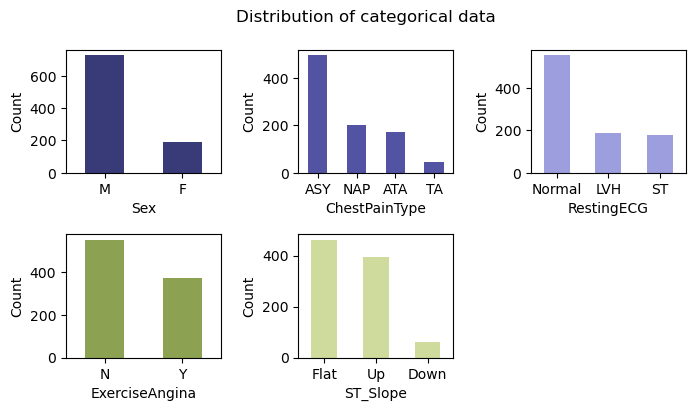

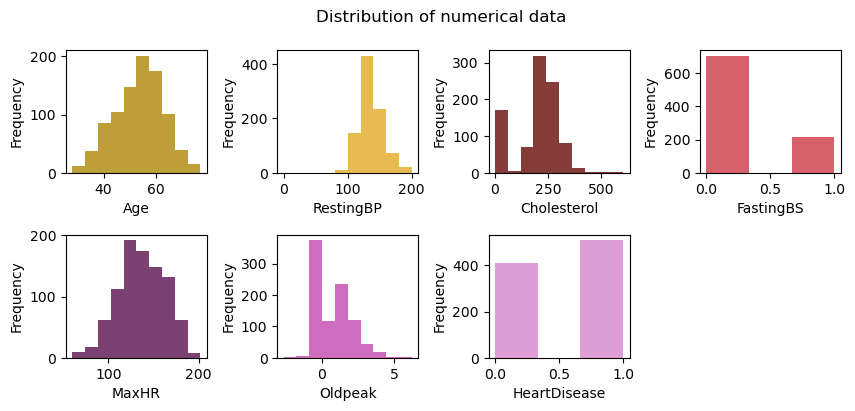

In [5]:
cat_data = list(df.select_dtypes(include=['object']))
num_data = list(df.select_dtypes(exclude=['object']))
print(len(num_data))
cmap=plt.cm.get_cmap('tab20b', 12).colors

# categorical data

fig1 = plt.figure(figsize=(8,4))
fig1.suptitle("Distribution of categorical data")

gs1 = gridspec.GridSpec(2, 6)
gs1.update(wspace = 2, hspace = 0.5)

ax1 = plt.subplot(gs1[0, :2])
df[cat_data[0]].value_counts().plot(kind='bar', xlabel=cat_data[0], ylabel='Count', rot=0, ax=ax1, color=cmap[0])

ax2 = plt.subplot(gs1[0, 2:4])
df[cat_data[1]].value_counts().plot(kind='bar', xlabel=cat_data[1], ylabel='Count', rot=0, ax=ax2, color=cmap[1])

ax3 = plt.subplot(gs1[0, 4:6])
df[cat_data[2]].value_counts().plot(kind='bar', xlabel=cat_data[2], ylabel='Count', rot=0, ax=ax3, color=cmap[2])

ax4 = plt.subplot(gs1[1, :2])
df[cat_data[3]].value_counts().plot(kind='bar', xlabel=cat_data[3], ylabel='Count', rot=0, ax=ax4, color=cmap[3])

ax5 = plt.subplot(gs1[1, 2:4])
df[cat_data[4]].value_counts().plot(kind='bar', xlabel=cat_data[4], ylabel='Count', rot=0, ax=ax5, color=cmap[4])


# numerical data

fig2 = plt.figure(figsize=(10,4))
fig2.suptitle("Distribution of numerical data")

gs2 = gridspec.GridSpec(2, 8)
gs2.update(wspace = 2, hspace = 0.5)

ax6 = plt.subplot(gs2[0, :2])
ax6.set_xlabel(str(num_data[0]))
ax6.set_ylabel("Count")
df[num_data[0]].plot(kind='hist', ylabel='Count', rot=0, ax=ax6, color=cmap[5])

ax7 = plt.subplot(gs2[0, 2:4])
ax7.set_xlabel(str(num_data[1]))
ax7.set_ylabel("Count")
df[num_data[1]].plot(kind='hist', xlabel=num_data[1], ylabel='Count', rot=0, ax=ax7, color=cmap[6])

ax8 = plt.subplot(gs2[0, 4:6])
ax8.set_xlabel(str(num_data[2]))
ax8.set_ylabel("Count")
df[num_data[2]].plot(kind='hist', xlabel=num_data[2], ylabel='Count', rot=0, ax=ax8, color=cmap[7])

ax9 = plt.subplot(gs2[0, 6:8])
ax9.set_xlabel(str(num_data[3]))
ax9.set_ylabel("Count")
df[num_data[3]].plot(bins=3, kind='hist', xlabel=num_data[3], ylabel='Count', rot=0, ax=ax9, color=cmap[8])

ax10 = plt.subplot(gs2[1, :2])
ax10.set_xlabel(str(num_data[4]))
ax10.set_ylabel("Count")
df[num_data[4]].plot(kind='hist', xlabel=num_data[4], ylabel='Count', rot=0, ax=ax10, color=cmap[9])

ax11 = plt.subplot(gs2[1, 2:4])
ax11.set_xlabel(str(num_data[5]))
ax11.set_ylabel("Count")
df[num_data[5]].plot(kind='hist', xlabel=num_data[5], ylabel='Count', rot=0, ax=ax11, color=cmap[10])

ax12 = plt.subplot(gs2[1, 4:6])
ax12.set_xlabel(str(num_data[6]))
ax12.set_ylabel("Count")
df[num_data[6]].plot.hist(bins=3,xlabel=num_data[6], ylabel='Count', rot=0, ax=ax12, color=cmap[11])


plt.show()

## 1.2 Preprocessing

**A.** Deal with missing data: 
+ Replace the zero entries in Cholesterol by the column's median to minimize the information provided

In [6]:
chol_median = df['Cholesterol'].median()
print("Median is", chol_median)

for index, row in df.iterrows():
    if row['Cholesterol'] == 0:
        row['Cholesterol'] = chol_median

Median is 223.0


**B.** Handle non-numerical data: Use `OrdinalEncode` from `sklearn.preprocessing`

In [7]:
le = LabelEncoder()
columnsToEncode = list(df.select_dtypes(include=['category','object']))
print("Columns with non-numerical data:", columnsToEncode)

Columns with non-numerical data: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [8]:
df_ordinal = df.copy()

for feature in columnsToEncode:
    df_ordinal[feature] = le.fit_transform(df_ordinal[feature])
    
df_ordinal.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


We now have ordinal numeric values for each category, so we can analyse the correlations between the features to decide whether to remove some of the features during training:

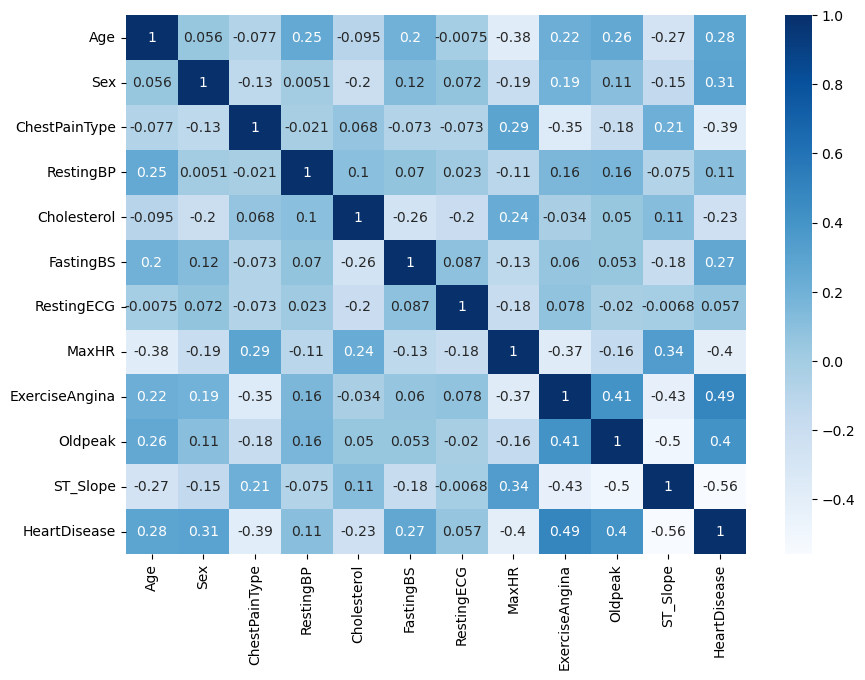

In [76]:
plt.figure(figsize = (10, 7))
sns.heatmap(df_ordinal.corr(), annot=True, cmap="Blues")
plt.show()

*Results:*  
+ almost no correlation between RestingECG and HeartDisease as well as between RestingBP and HeartDisease
+ leave out in further steps?

**B. Alternative**  
Use One Hot Encoding so that the categorical property is maintained and one category not considered more important than another (pandas `get_dummies()` uses one-hot encoding as default).

In [10]:
df_onehot = df.copy()

for category in columnsToEncode:
    df_onehot = pd.concat([df_onehot, pd.get_dummies(df_onehot[category], prefix=category,dummy_na=False)],axis=1).drop([category],axis=1)

df_onehot.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


As this variant is the better choice for Machine Learning applications, we stick to `df_onehot` from now on.

In [11]:
cats = np.array(df_onehot.columns)

cats_x = cats[cats == "HeartDisease"]
cats_y = cats[cats != 'HeartDisease']
X_df = df_onehot.drop(columns=cats_x)
Y_df = df_onehot.drop(columns=cats_y)

**C.** Normalisation and zero-centering

In [12]:
scaler = StandardScaler()
X_scaled = X_df.copy()

X_scaled = scaler.fit_transform(X_scaled)

## 1.3 Split data into training and test set

In [13]:
X = X_df.to_numpy()
y = np.ndarray.flatten(Y_df.to_numpy())

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, shuffle=True)

# 2. Linear Regression Models
We will start with a very basic linear regression model, although having the expectation that this will not suffice our requirements. Nevertheless, we want a baseline model from which one we can improve during further steps.  

## 2.1 Ridge Regression

To choose the optimal alpha without considering the test performance, we select it via k-fold cross validation:

In [22]:
random.seed(123456)

k = 10
kf = KFold(n_splits=k, random_state=None)

acc_score = []
idx = 1

for train_index , test_index in kf.split(X_train):

    y_train_fold, y_test_fold = y_train[train_index] , y_train[test_index]
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    
    model = linear_model.RidgeClassifier(alpha=0.1*idx)
    model.fit(X_train_fold, y_train_fold)
    acc_fold = model.score(X_test_fold, y_test_fold)
    acc_score.append(acc_fold)
    print("The training accuracy is", round(acc_fold, 2) ,"for alpha =",round(0.1*idx, 2))
    idx += 1
    
    
best_alpha = (np.argmax(np.array(acc_score)) + 1) * 0.1
print()
print("The best accuracy was achieved by alpha =",round(best_alpha,2), "with a value of",round(acc_score[np.argmax(np.array(acc_score))],2))    

The training accuracy is 0.84 for alpha = 0.1
The training accuracy is 0.97 for alpha = 0.2
The training accuracy is 0.87 for alpha = 0.3
The training accuracy is 0.82 for alpha = 0.4
The training accuracy is 0.87 for alpha = 0.5
The training accuracy is 0.92 for alpha = 0.6
The training accuracy is 0.85 for alpha = 0.7
The training accuracy is 0.87 for alpha = 0.8
The training accuracy is 0.82 for alpha = 0.9
The training accuracy is 0.92 for alpha = 1.0

The best accuracy was achieved by alpha = 0.2 with a value of 0.97


In [86]:
model = linear_model.RidgeClassifier(alpha=best_alpha)
model.fit(X_train, y_train)

acc_ridge = model.score(X_test, y_test)
y_pred_ridge = model.predict(X_test)
mse_ridge = mean_squared_error(y_pred_ridge, y_test)

print("The resulting test accuracy for Ridge Regression is", round(acc_ridge*100, 2), "% with an MSE of", round(mse_ridge, 2))

The resulting test accuracy for Ridge Regression is 85.48 % with an MSE of 0.15


Analyse the performance by looking at the confusion matrix:

## 2.2 Logistic Regression

We choose the liblinear-solver, as this is said to be best for smaller datasets in the scikit-learn API.

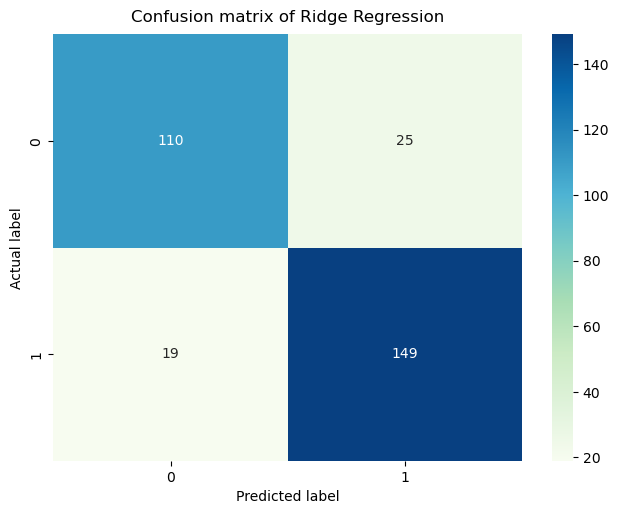

In [77]:
cnf_matrix_ridge = metrics.confusion_matrix(y_test, y_pred_ridge)

class_names=[0,1]

fig, ax = plt.subplots() 

tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

sns.heatmap(pd.DataFrame(cnf_matrix_ridge), annot=True, cmap="GnBu" ,fmt='g') 

ax.xaxis.set_label_position("bottom") 

plt.tight_layout() 
plt.title('Confusion matrix of Ridge Regression', y=1.01) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

plt.show()

In [87]:
log_model = linear_model.LogisticRegression(solver='liblinear', max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
mse_log = mean_squared_error(y_pred_log, y_test)
acc_log = log_model.score(X_test, y_test)

print("The resulting test accuracy for Logistic Regression is", round(acc_log*100, 2), "% with an MSE of", round(mse_log, 2))

The resulting test accuracy for Logistic Regression is 85.48 % with an MSE of 0.15


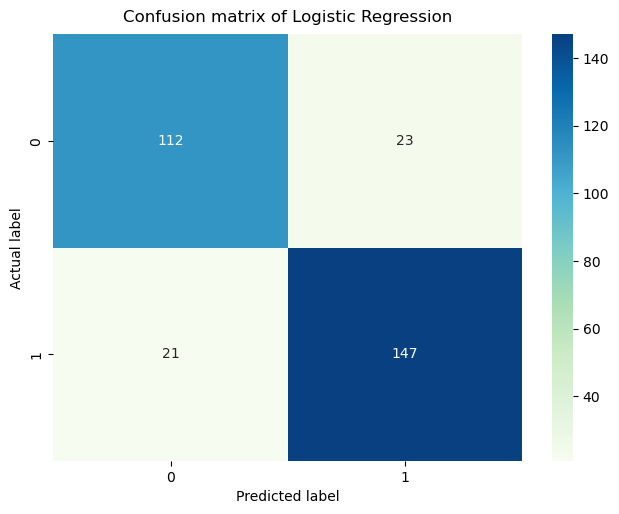

In [85]:
cnf_matrix_log = metrics.confusion_matrix(y_test, y_pred_log)

class_names=[0,1]

fig, ax = plt.subplots() 

tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True, cmap="GnBu",fmt='g') #"PuRd"

ax.xaxis.set_label_position("bottom") 

plt.tight_layout() 
plt.title('Confusion matrix of Logistic Regression', y=1.01) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

plt.show()

## 2.3 Support Vector Classifier

Due to the distributions of the input variables, we decided to use Gaussian kernels.

In [96]:
svc_model = SVC(kernel="rbf", C=0.1)
svc_model.fit(X_train, y_train)

y_pred_svc = svc_model.predict(X_test)
mse_svc = mean_squared_error(y_pred_svc, y_test)
acc_svc = log_model.score(X_test, y_test)

print("The resulting test accuracy for Logistic Regression is", round(acc_svc*100, 2), "% with an MSE of", round(mse_svc, 2))

The resulting test accuracy for Logistic Regression is 85.48 % with an MSE of 0.14
